<a href="https://colab.research.google.com/github/Gajalakshmisubramani/data_Visualization_codes/blob/main/DVT_using_dash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

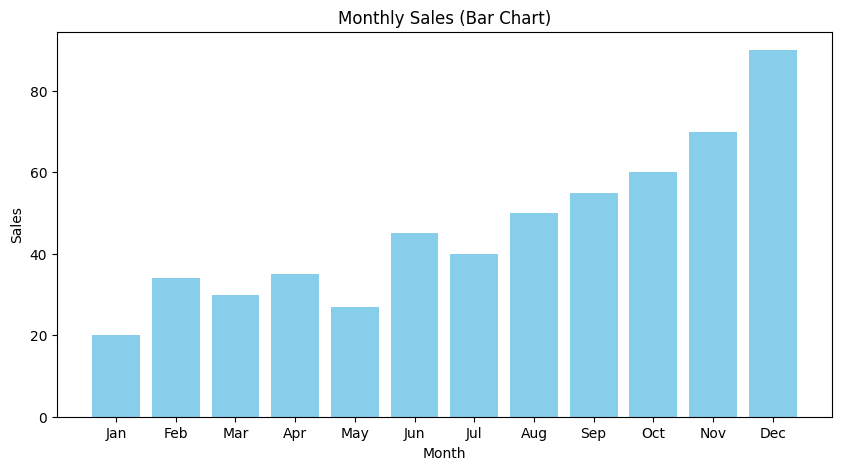

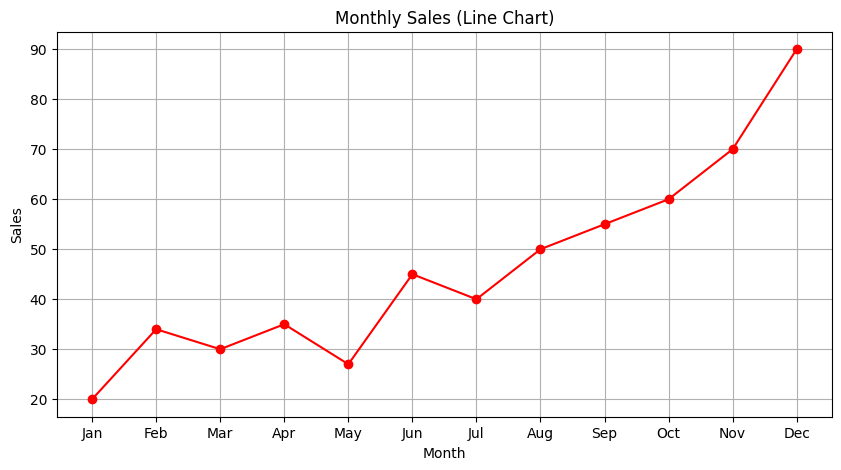

T-test statistic: -2.3446643858664404,p-value: 0.021061503181884017


In [ ]:
#1
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sales=[20,34,30,35,27,45,40,50,55,60,70,90]
plt.figure(figsize=(10,5))
plt.bar(months,sales,color='skyblue')
plt.title('Monthly Sales (Bar Chart)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.savefig('bar_chart.png')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(months,sales,color='red',linestyle='-',marker='o')
plt.title('Monthly Sales (Line Chart)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.savefig('line_chart.png')
plt.show()

scores_bar_chart=np.random.normal(7,1.5,50)
scores_line_graph=np.random.normal(8,1,50)

t_stat,p_val=stats.ttest_ind(scores_bar_chart,scores_line_graph)
print(f'T-test statistic: {t_stat},p-value: {p_val}')

In [ ]:
#2
import folium
import pandas as pd
data=[
    {'neighborhood':'A','population':1200,'lat':37.7749,'lon':-122.4194},
    {'neighborhood':'B','population':1500,'lat':37.7849,'lon':-122.4094},
    {'neighborhood':'C','population':800,'lat':37.7949,'lon':-122.4294},
]

df=pd.DataFrame(data)
map=folium.Map(location=[37.7749,-122.4194],zoom_start=13)
from folium.plugins import HeatMap
heat_data=[[row['lat'],row['lon'],row['population']] for index,row in df.iterrows()]
HeatMap(heat_data).add_to(map)
map.save('heatmap.html')
map


In [ ]:
#3
!pip install dash
import pandas as pd
data={
    'Date':pd.date_range(start='2023-01-01',periods=100,freq='D'),
    'Category':['Electronics','Furniture','Clothing','Groceries']*25,
    'Sales':[200,150,300,100,250,120,320,180,220,160]*10,
    'Region':['North','South','East','West']*25
}
df=pd.DataFrame(data)
print(df.head())
import dash
from dash import dcc,html
from dash.dependencies import Input,Output
import plotly.express as px
app=dash.Dash(__name__)
app.layout=html.Div([
    html.H1("Interactive Sales Dashboard"),
    dcc.DatePickerRange(
        id='date_range',
        start_date=df['Date'].min(),
        end_date=df['Date'].max(),
        display_format='YYYY-MM-DD'
    ),
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label':x,'value':x} for x in df['Category'].unique()],
        value=df['Category'].unique().tolist(),
        multi=True
    ),
    dcc.Graph(id='sales-trend'),
    dcc.Graph(id='sales-region')
])
@app.callback(
    Output('sales-trend','figure'),
    [Input('date_range','start_date'),
    Input('date_range','end_date'),
    Input('category-dropdown','value')]
)
def update_sales_trend(start_date,end_date,selected_categories):
    filtered_df=df[(df['Date']>=start_date)&(df['Date']<=end_date)&(df['Category'].isin(selected_categories))]
    fig=px.line(filtered_df,x='Date',y='Sales',color='Category',title='Sales Trend')
    return fig
@app.callback(
    Output('sales-region','figure'),
    [Input('date_range','start_date'),
     Input('date_range','end_date'),
     Input('category-dropdown','value')]
)
def update_sales_region(start_date,end_date,selected_categories):
    filtered_df=df[(df['Date']>=start_date)&(df['Date']<=end_date)&(df['Category'].isin(selected_categories))]
    fig=px.bar(filtered_df,x='Region',y='Sales',color='Category',barmode='group',title='Sales by Region')
    return fig
if __name__=='__main__':
    app.run_server(debug=True)


        Date     Category  Sales Region
0 2023-01-01  Electronics    200  North
1 2023-01-02    Furniture    150  South
2 2023-01-03     Clothing    300   East
3 2023-01-04    Groceries    100   West
4 2023-01-05  Electronics    250  North


<IPython.core.display.Javascript object>

In [ ]:
#4
import pandas as pd
data_a={'Temperature':[20,30,40,50],
        'Reaction Time':[120,90,60,45],
        'Source':['A']*4
       }
data_b={
        'Temperature':[20,30,40,50],
        'Reaction Time':[110,85,55,40],
        'Source':['B']*4
       }
df_a=pd.DataFrame(data_a)
df_b=pd.DataFrame(data_b)
df=pd.concat([df_a,df_b])

!pip install dash
import dash
from dash import dcc,html
from dash.dependencies import Input,Output
import plotly.express as px
app=dash.Dash(__name__)
app.layout=html.Div([
    html.H1("Comparative Visualizations of Reaction Rates"),
    dcc.Graph(id='reaction-graph'),
    dcc.Checklist(
        id='source-checklist',
        options=[
            {'label':'A','value':'A'},
            {'label':'B','value':'B'}
        ],
        value=['A','B'],
        inline=True
    )
])
@app.callback(
    Output('reaction-graph','figure'),
    [Input('source-checklist','value')]
)
def update_graph(selected_sources):
    filtered_df=df[df['Source'].isin(selected_sources)]
    fig=px.line(filtered_df,x='Temperature',y='Reaction Time',color='Source',title='Reaction Time vs Temperature')
    return fig

if __name__=='__main__':
    app.run_server(debug=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 40.0 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

In [ ]:
#6
import pandas as pd
data={
    'Country':['USA','India','Brazil','Russia','UK'],
    'Cases':[33000000,29000000,20000000,18000000,4500000]
}
df=pd.DataFrame(data)
import dash
from dash import dcc,html
from dash.dependencies import Input,Output
import plotly.express as px
app=dash.Dash(__name__)
app.layout=html.Div([
    html.H1("Geographic Distribution of COVID-19 Cases"),
    dcc.Graph(id='geo-graph'),
    dcc.Dropdown(
        id='region-dropdown',
        options=[
            {'label':'World','value':'world'},
            {'label':'North America','value':'north america'},
            {'label':'Europe','value':'europe'},
            {'label':'Asia','value':'asia'}
        ],
        value='world'
    )
])
@app.callback(
    Output('geo-graph','figure'),
    [Input('region-dropdown','value')]
)
def update_graph(selected_region):
    fig=px.choropleth(df,locations='Country',locationmode='country names',
    color='Cases',hover_name='Country',color_continuous_scale=px.colors.sequential.Plasma,
    scope=selected_region,title=f'COVID-19 in {selected_region.title()}')
    return fig
if __name__=='__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
#7
import tweepy
import pandas as pd
from textblob import TextBlob
api_key="h86N9og7PHm4cvnE8HQyVj4WV"
api_key_secret="BNPjWxhuxmiOz0PylcdbRiAQiVXq76i1vYw0vtQBWWr4m3F46d"
access_token="1000719937420247043-XYjBFZp97qmEo63wXuhIiRXSqbsCwj"
access_token_secret="lcIAjBGj8yxFSwdwfXRFYD768T2DjzZYD1Z0LMTwBnCyx"
auth=tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)
query="Robert Downey Jr"
tweets=tweepy.Cursor(api.search_tweets,q=query,lang="en",tweet_mode="extended").items(1000)
data=[]
for tweet in tweets:
    text=tweet.full_text
    sentiment=TextBlob(text).sentiment.polarity
    sentiment_class='positive' if sentiment>0 else 'negative' if sentiment<0 else 'neutral'
    data.append([tweet.created_at,text,tweet.user.location,sentiment_class])
df=pd.DataFrame(data,columns=['Timestamp','Text','Location','Sentiment'])
import dash
from dash import dcc,html
from dash.dependencies import Input,Output
import plotly.express as px
app=dash.Dash(__name__)
app.layout=html.Div([
    html.H1("Twitter Sentiment Analysis on a specified topic"),
    dcc.Graph(id='sentiment-graph'),
    dcc.Graph(id='timeline-graph'),
    dcc.Graph(id='location-graph'),
    dcc.Interval(
        id='interval-component',
        interval=1*60000,
        n_intervals=0
    )
])
@app.callback(
    Output('sentiment-graph','figure'),
    [Input('interval-component','n_intervals')]
)
def update_sentiment_graph(n):
    sentiment_counts=df['Sentiment'].value_counts().reset_index()
    fig=px.pie(sentiment_counts,values='Sentiment',names='index',title='Sentiment Distribution')
    return fig
@app.callback(
    Output('timeline-graph','figure'),
    [Input('interval-component','n_intervals')]
)
def update_timeline_graph(n):
    df['Date']=pd.to_datetime(df['Timestamp']).dt.date
    volume=df.groupby('Date').size().reset_index(name='Tweet Count')
    fig=px.line(volume,x='Date',y='Tweet Count',title='Tweet Volume over Time')
    return fig
@app.callback(
    Output('location-graph','figure'),
    [Input('interval-component','n_intervals')]
)
def update_location_graph(n):
    fig=px.scatter_geo(df,locations="Location",hover_name="Location",
    title='Geographical Distribution of Tweets')
    return fig
if __name__=='__main__':
    app.run_server(debug=True)


Forbidden: 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product

<ipython-input-6-ce7964500903>:22: UserWarning:

You passed a edgecolor/edgecolors ('k') for an unfilled marker (0).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



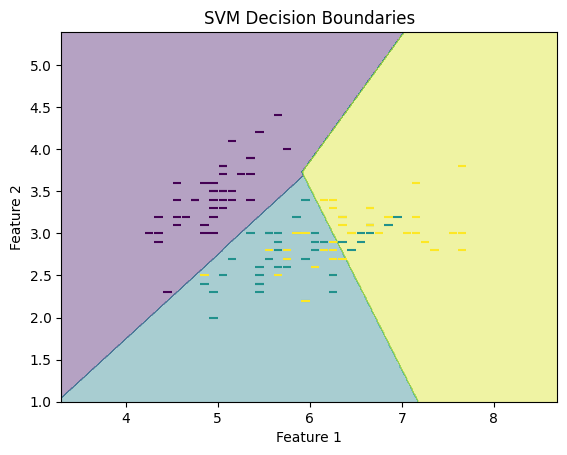

In [ ]:
#8
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
iris=load_iris()
X=iris.data[:,:2]
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
svm_model=SVC(kernel='linear',C=1.0)
svm_model.fit(X_train,y_train)
def plot_decision_boundaries(X,y,model,title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
    Z=model.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,alpha=0.4)
    plt.scatter(X[:,0],X[:,1],c=y,edgecolor='k',marker=0)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
plot_decision_boundaries(X_train,y_train,svm_model,'SVM Decision Boundaries')


   TransactionID    Item
0              1   Bread
1              1    Milk
2              1  Butter
3              2   Bread
4              2  Butter
5              3    Milk
6              3    Eggs
7              4   Bread
8              4  Butter
9              4    Eggs
   Bread  Butter   Eggs   Milk
0   True    True  False   True
1   True    True  False  False
2  False   False   True   True
3   True    True   True  False
  antecedents consequents  antecedent support  consequent support  support  \
0    (Butter)     (Bread)                0.75                0.75     0.75   
1     (Bread)    (Butter)                0.75                0.75     0.75   

   confidence      lift  leverage  conviction  zhangs_metric  
0         1.0  1.333333    0.1875         inf            1.0  
1         1.0  1.333333    0.1875         inf            1.0  


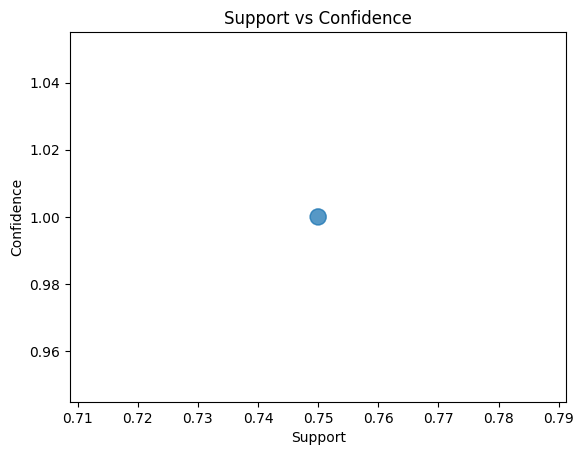

In [ ]:
#9
import pandas as pd
data={'TransactionID': [1,1,1,2,2,3,3,4,4,4],
      'Item':['Bread','Milk','Butter','Bread','Butter','Milk','Eggs','Bread','Butter','Eggs']}
df=pd.DataFrame(data)
print(df)
from mlxtend.preprocessing import TransactionEncoder
transactions=df.groupby('TransactionID')['Item'].apply(list).tolist()
te=TransactionEncoder()
te_ary=te.fit(transactions).transform(transactions)
df_encoded=pd.DataFrame(te_ary,columns=te.columns_)
print(df_encoded)
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(df_encoded,min_support=0.5,use_colnames=True)
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1.0)
print(rules)
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'],alpha=0.5,marker="o",s=rules['lift']*100)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



                                              Review
0  I love this product! It works great and is exa...
1  Terrible service. I will not buy from here again.
2               Decent quality, but could be better.
3  Fantastic! Exceeded my expectations in every way.
4            Not worth the money. Very disappointed.
5               Average experience, nothing special.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                              Review  \
0  I love this product! It works great and is exa...   
1  Terrible service. I will not buy from here again.   
2               Decent quality, but could be better.   
3  Fantastic! Exceeded my expectations in every way.   
4            Not worth the money. Very disappointed.   
5               Average experience, nothing special.   

                                      Cleaned_Review  Sentiment  
0    l v e h p r u c w r k g r e n e x c l e c r b e        0.0  
1  e r r b l e e r v c e w l l n b u f r h e r e g n        0.0  
2                e c e n q u l b u c u l b e b e e r        0.0  
3          f n c e x c e e e e x p e c n n e v e r w        0.0  
4                      n w r h h e n e v e r p p n e        0.0  
5        v e r g e e x p e r e n c e n h n g p e c l        0.0  


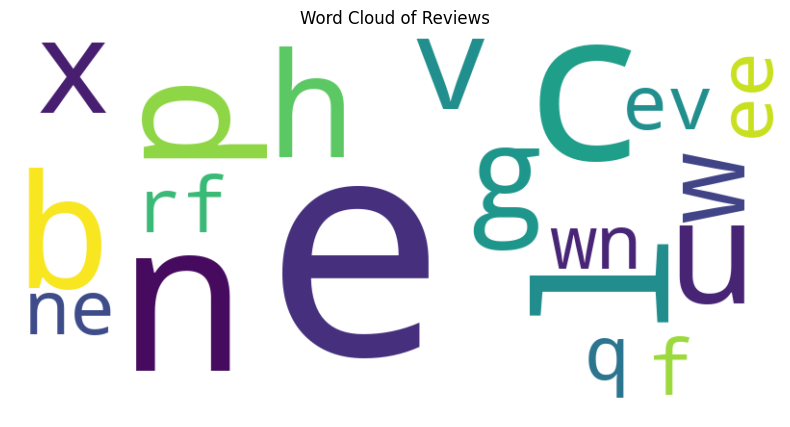

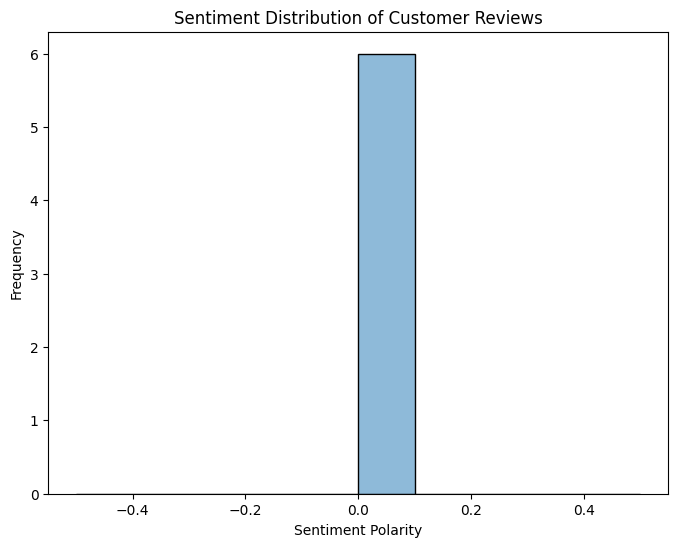

In [ ]:
#10
import pandas as pd
data={
    'Review':['I love this product! It works great and is exactly as described!','Terrible service. I will not buy from here again.','Decent quality, but could be better.','Fantastic! Exceeded my expectations in every way.','Not worth the money. Very disappointed.','Average experience, nothing special.']
}
df=pd.DataFrame(data)
print(df)
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
def preprocess_text(text):
    text=text.lower()
    text=' '.join([char for char in text if char.isalnum() or char.isspace()])
    text=' '.join([word for word in text.split() if word not in stop_words])
    return text
df['Cleaned_Review']=df['Review'].apply(preprocess_text)
def get_sentiment(text):
    blob=TextBlob(text)
    return blob.sentiment.polarity
df['Sentiment']=df['Cleaned_Review'].apply(get_sentiment)
print(df)
all_reviews=''.join(df['Cleaned_Review'])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(all_reviews)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()
plt.figure(figsize=(8,6))
sns.histplot(df['Sentiment'],kde=True,bins=10)
plt.title('Sentiment Distribution of Customer Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#7
import pandas as pd
import numpy as np
from textblob import TextBlob
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import random
from datetime import datetime, timedelta

# Simulate tweet data
def generate_tweet_data(num_tweets=1000):
    data = []
    locations = [
        "UK", "USA", "Canada", "Australia", "India", "Germany", "France",
        "Japan", "Brazil", "South Africa", "Mexico", "Italy", "Spain"
    ]
    for _ in range(num_tweets):
        timestamp = datetime.now() - timedelta(days=random.randint(0, 30), hours=random.randint(0, 23))
        text = random.choice([
            "I love Robert Downey Jr!",
            "He is an amazing actor!",
            "Not a fan of his recent movies.",
            "Robert Downey Jr. is the best!",
            "I don't really like his acting.",
            "He does a great job in Iron Man!"
        ])
        location = random.choice(locations)  # Randomly choose location
        sentiment = TextBlob(text).sentiment.polarity
        sentiment_class = 'positive' if sentiment > 0 else 'negative' if sentiment < 0 else 'neutral'
        data.append([timestamp, text, location, sentiment_class])
    return pd.DataFrame(data, columns=['Timestamp', 'Text', 'Location', 'Sentiment'])

# Generate mock data
df = generate_tweet_data()

# Initialize Dash app
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Simulated Twitter Sentiment Analysis on 'Robert Downey Jr'"),
    dcc.Graph(id='sentiment-graph'),
    dcc.Graph(id='timeline-graph'),
    dcc.Graph(id='location-graph'),
    dcc.Interval(
        id='interval-component',
        interval=1 * 60000,  # 1 minute
        n_intervals=0
    )
])

@app.callback(
    Output('sentiment-graph', 'figure'),
    [Input('interval-component', 'n_intervals')]
)
def update_sentiment_graph(n):
    sentiment_counts = df['Sentiment'].value_counts().reset_index()
    sentiment_counts.columns = ['Sentiment', 'Count']
    fig = px.pie(sentiment_counts, values='Count', names='Sentiment', title='Sentiment Distribution')
    return fig

@app.callback(
    Output('timeline-graph', 'figure'),
    [Input('interval-component', 'n_intervals')]
)
def update_timeline_graph(n):
    df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
    volume = df.groupby('Date').size().reset_index(name='Tweet Count')
    fig = px.line(volume, x='Date', y='Tweet Count', title='Tweet Volume over Time')
    return fig

@app.callback(
    Output('location-graph', 'figure'),
    [Input('interval-component', 'n_intervals')]
)
def update_location_graph(n):
    fig = px.scatter_geo(df, locations="Location", hover_name="Location",
                         title='Geographical Distribution of Tweets',
                         locationmode='country names')  # Ensures locations are interpreted correctly
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)
